# Accor company's Stock Prediction using LSTM 

In [108]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

CAC40 is a French stock market index. It represents a capitalization-weighted measure of the 40 most significant stocks among the 100 largest market caps on the Euronext Paris. Its acronym: Cotation Assistée en Continu = continuous assisted trading, and is used as a benchmark index for funds investing in the French stock market.

# Load Data

In [109]:
df = pd.read_csv('pro_dCAC40.csv')
df.head()

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


# Basic Understanding

In [110]:
df['Name'].unique()

array(['Accor', 'Air Liquide', 'Airbus ', 'ArcelorMittal', 'Atos', 'AXA',
       'BNP Paribas', 'Bouygues', 'Cap Gemini', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Engie (ex GDF Suez',
       'EssilorLuxottica', 'Hermès (Hermes International', 'Kering',
       'LEGRAND', 'LOréal', 'LVMH Moet Hennessy Louis Vuitton',
       'Michelin (Compagnie Générale d Etablissements Michelin SCPA',
       'Orange', 'Pernod Ricard', 'Peugeot', 'Publicis', 'Renault',
       'SAFRAN', 'Saint-Gobain', 'Sanofi', 'Schneider Electric',
       'Société Générale (Societe Generale', 'Sodexo',
       'STMicroelectronics', 'TOTAL', 'Unibail-Rodamco',
       'Veolia Environnement', 'VINCI', 'Vivendi', 'Worldline SA'],
      dtype=object)

In [111]:
print(df['Date'].min())
print(df['Date'].max())

2010-01-04
2020-04-03


In [112]:
#remove unneccesary columns
df = df.drop('Unnamed: 0', axis=1)

In [113]:
df.head(2)

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250


In [114]:
#convert volume to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

In [115]:
df['Volume'].isnull().sum()

58003

# Selecting and Filtering

In here, we'll define a function to extract the data from the **Accor** company within a time period.                                                                         
the **closing price** column will be renamed as **Close**

In [116]:
#defined a function to extract data for a specific company

def load_data(company, start, end):
    dff = df.copy()
    dff = dff.loc[dff.Name == company, :]
    dff = dff.loc[(dff['Date'] > start) & (dff['Date'] < end), :]
    dff = dff.rename(columns = {'Closing_Price': 'Close'})
    return dff

In [117]:
COMPANY = 'Accor'
START_DATE = dt.datetime(2015,1,1)
END_DATE = dt.datetime(2020,1,1)

START_DATE_TEST = END_DATE

In [118]:
#let's apply the pre-defined function

df['Date'] = pd.to_datetime(df['Date'])
data = load_data(company=COMPANY, start=START_DATE, end=END_DATE)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 67 to 1328
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1262 non-null   object        
 1   Date        1262 non-null   datetime64[ns]
 2   Open        1262 non-null   float64       
 3   Close       1262 non-null   float64       
 4   Daily_High  1262 non-null   float64       
 5   Daily_Low   1262 non-null   float64       
 6   Volume      531 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 78.9+ KB


In [122]:
data.describe()

,Date,Open,Close,Daily_High,Daily_Low,Volume
count,1262,1262.000000,1262.000000,1262.000000,1262.000000,531.000000
mean,2017-06-28 09:51:03.708399360,39.864437,39.886775,39.967971,39.784596,191.832392
min,2015-01-02 00:00:00,29.210000,29.210000,29.210000,29.210000,1.000000
25%,2016-04-01 18:00:00,37.062500,37.060000,37.162500,36.960000,38.000000
50%,2017-06-27 12:00:00,39.440000,39.545000,39.560000,39.380000,105.000000
75%,2018-09-24 18:00:00,42.865000,42.870000,42.922500,42.827500,290.000000
max,2019-12-30 00:00:00,49.240000,49.240000,49.240000,49.240000,977.000000
std,NaN,4.097823,4.094553,4.092564,4.097866,211.458440


By looking at this chart, you 'll able to understand the distribution of the data point with each variable.

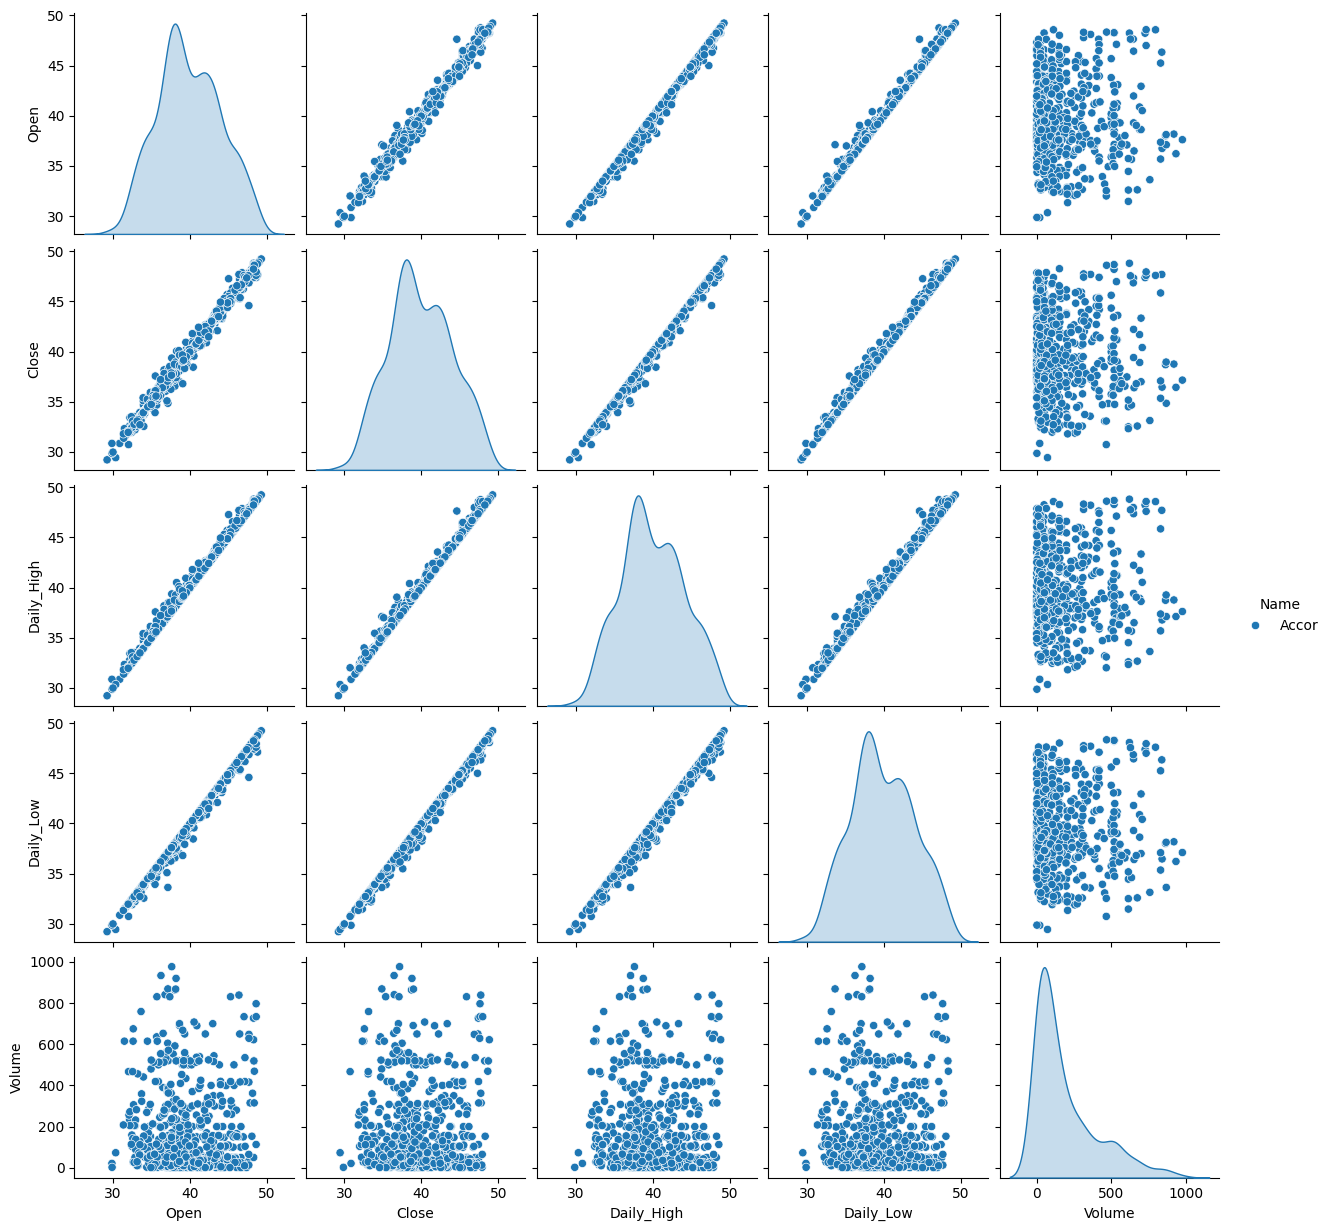

<Figure size 600x400 with 0 Axes>

In [123]:
# Customize the plot (optional)
sns.pairplot(data, vars=["Open", "Close", "Daily_High", "Daily_Low","Volume"], hue='Name')
plt.figure(figsize=(6, 4))

plt.show()

Still has null

In [124]:
data.head(2)

,Name,Date,Open,Close,Daily_High,Daily_Low,Volume
67,Accor,2019-12-30,42.10,42.1,42.1,42.10,NaN
68,Accor,2019-12-27,41.92,42.2,42.2,41.92,135.0


# Data Preprocessing

In [125]:
#replace null values with the mean
data['Volume'] = data['Volume'].fillna(data['Volume'].mean())

**Normalise data**

In [126]:
# MinMaxScaler method
scaler = MinMaxScaler(feature_range=(0,1))

#rename the column to 'Close'
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [127]:
scaled_data

array([[0.6435347 ],
       [0.64852721],
       [0.64303545],
       ...,
       [0.27608587],
       [0.31203195],
       [0.31752371]])

**Define prediction days**

we'll set the number of days to predict the days

In [128]:
#define prediction days
prediction_days = 60

**Create Training Data**

It iterates through the normalized closing price data, creating sequences of past closing prices (prediction_days length) as input and the corresponding next day's closing price as the target output...................................................................................                                                                                                                                                                                                                                 These sequences are converted into NumPy arrays and reshaped into 3D arrays suitable for the LSTM model input format.

**Input** - Past clossing Prices

**Output** - coresponding next day's closing prices

In [129]:
#training data input and output
x_train = []
y_train = []

#iterate through the data
for x in range(prediction_days, len(scaled_data)):
    #append the data to x_train
    x_train.append(scaled_data[x-prediction_days:x, 0])
    #append the current value to y_train
    y_train.append(scaled_data[x, 0])


In [130]:
#convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data to 3D array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM Model

Model Architecture

The model has 3 layers with 50 unites each and dropout layers for regularisation.

In [131]:
def LSTM_model():
    #initialize model
    model = Sequential()

    #first layer=50, return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

    #add dropout layer for regularization(overfitting)
    model.add(Dropout(0.2))

    #Second LSTM layer=50 units, return sequence
    model.add(LSTM(units=50, return_sequences=True))

    #add dropout to prevent overfitting
    model.add(Dropout(0.2))

    #Third LSTM layer=50 units
    model.add(LSTM(units=50))

    #add dropout to prevent overfitting
    model.add(Dropout(0.2))

    #add a dense layer=1 units
    model.add(Dense(units=1))

    return model

Note that the Final layer has a single unit to determine the colosing price

# Train the Model

One benifit of using **adam** optimizer in this case is, it can  automatically adjust the learning rate during training while exhibiting fluctuations and sparse gradient and noicy data.

In [132]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

**Early stopping and model checkpointing** are used to monitor and save the best performing model during the training.

epochs = 25                                                                    
batch_size = 32

We'll utilize early stopping and model chackpointing to prevent overfitting and save the best performing model.

In [133]:
#define callbacks

#save the best model with least validation loss
checkpoint = ModelCheckpoint(filepath='best_weights.dhf5', verbose=2, save_best_only=True)

model.fit(x_train, y_train, epochs=25, batch_size=32, callbacks=[checkpoint])

Epoch 1/25
38/38 [==============================] - 7s 42ms/step - loss: 0.0370
Epoch 2/25
38/38 [==============================] - 2s 41ms/step - loss: 0.0115
Epoch 3/25
38/38 [==============================] - 2s 41ms/step - loss: 0.0104
Epoch 4/25
38/38 [==============================] - 2s 42ms/step - loss: 0.0096
Epoch 5/25
38/38 [==============================] - 2s 40ms/step - loss: 0.0090
Epoch 6/25
38/38 [==============================] - 2s 41ms/step - loss: 0.0083
Epoch 7/25
38/38 [==============================] - 2s 41ms/step - loss: 0.0074
Epoch 8/25
38/38 [==============================] - 2s 45ms/step - loss: 0.0077
Epoch 9/25
38/38 [==============================] - 2s 41ms/step - loss: 0.0073
Epoch 10/25
38/38 [==============================] - 2s 45ms/step - loss: 0.0074
Epoch 11/25
38/38 [==============================] - 2s 52ms/step - loss: 0.0075
Epoch 12/25
38/38 [==============================] - 2s 55ms/step - loss: 0.0069
Epoch 13/25
38/38 [==================

Epoch 1/50
38/38 [==============================] - 2s 61ms/step - loss: 0.0043
Epoch 2/50
38/38 [==============================] - 2s 62ms/step - loss: 0.0039
Epoch 3/50
38/38 [==============================] - 3s 79ms/step - loss: 0.0043
Epoch 4/50
38/38 [==============================] - 2s 62ms/step - loss: 0.0043
Epoch 5/50
38/38 [==============================] - 3s 68ms/step - loss: 0.0043
Epoch 6/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0042
Epoch 7/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0045
Epoch 8/50
38/38 [==============================] - 2s 60ms/step - loss: 0.0039
Epoch 9/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0039
Epoch 10/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0038
Epoch 11/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0036
Epoch 12/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0038
Epoch 13/50
38/38 [==================

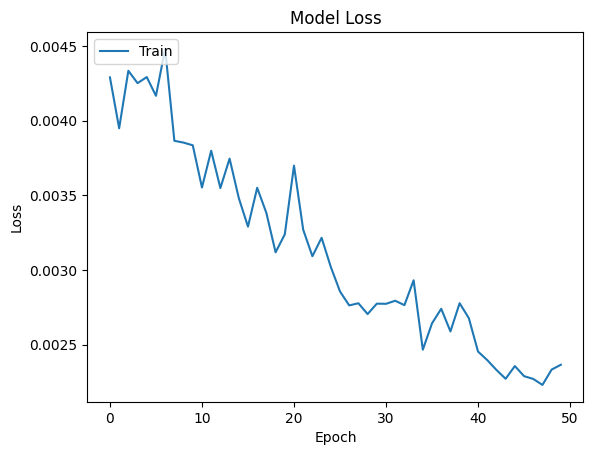

In [134]:
#plot the loss function
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Inference (Make Predictions)

The code prepares new data for prediction by extracting recent company's data upto the corrent date.                                                          
It combines this data and historical data for training and normalise it using the same scaling function

In [87]:
test_data = load_data(company=COMPANY, start=START_DATE_TEST, end=dt.datetime.now())

#extract the actual closing price from test
actual_prices = test_data['Close'].values

#combine the training data and test data
total_data = pd.concat((data['Close'], test_data['Close']), axis=0)

#inputs for the model
model_inputs = total_data[len(total_data) - len(test_data) - prediction_days:].values

#reshape the data to 2D array with a single column
model_inputs = model_inputs.reshape(-1, 1)

#normalize the data
model_inputs = scaler.transform(model_inputs)

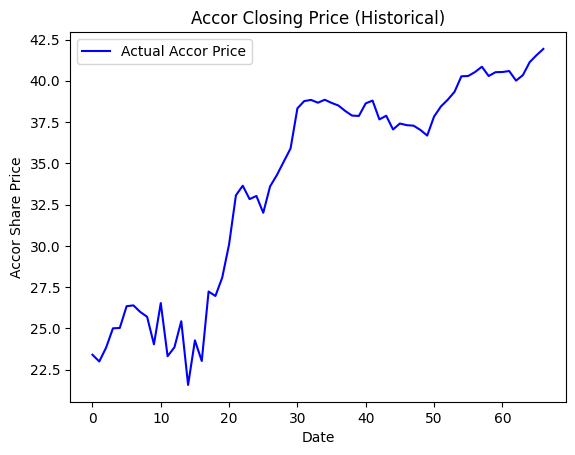

In [88]:
# ... (code up to prediction part)

# Plot actual closing prices
plt.plot(actual_prices, color='blue', label=f'Actual {COMPANY} Price')
plt.title(f'{COMPANY} Closing Price (Historical)')
plt.xlabel('Date')
plt.ylabel(f'{COMPANY} Share Price')
plt.legend()
plt.show()

The training model is used to predict the closing price for the next 60 days based on the inut sequence.                                               Then, the predicted prices are inverted back to the original scale.

In [89]:
#initialize an empty list for test data input
x_test = []

#iterate through the data
for x in range(prediction_days, len(model_inputs)):

    #append the data to x_test
    x_test.append(model_inputs[x-prediction_days:x, 0])

#convert the x_test list to numpy array
x_test = np.array(x_test)

#reshape the data to 3D array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#predict the prices
predicted_prices = model.predict(x_test)

#unnormalize the predicted prices
predicted_prices = scaler.inverse_transform(predicted_prices)

3/3 [==============================] - 1s 18ms/step


# Visualize Results

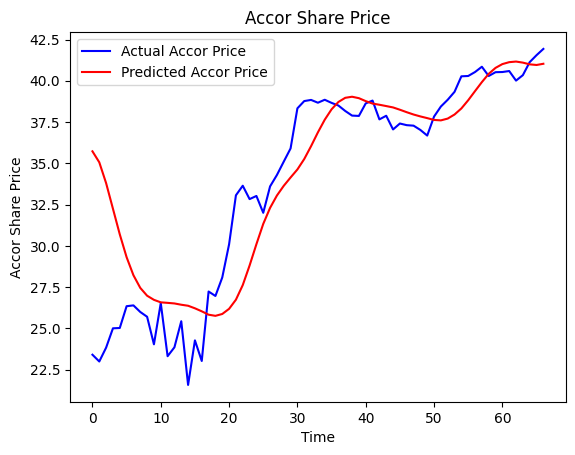

In [90]:
#plot the actual prices and predicted prices
plt.plot(actual_prices, color='blue', label=f'Actual {COMPANY} Price')

#plot the predicted prices
plt.plot(predicted_prices, color='red', label=f'Predicted {COMPANY} Price')

#set the title and labels
plt.title(f'{COMPANY} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{COMPANY} Share Price')
plt.legend()
plt.show()

The chart shows the actual closing prices against the predicted prices to visually compare the model's performance.                                         
It also prints the predicted closing price for the next day.

In [91]:
#extract last prediction days values
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]

In [92]:
#convert real_data list to a numpy array
real_data = np.array(real_data)

In [93]:
#reshape real_data to 3D array 
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [94]:
#generate prediction using LSTM model with real_data
prediction = model.predict(real_data)

1/1 [==============================] - 1s 1s/step


In [95]:
#invert scaling applied to the prediction to obtain actual value
prediction = scaler.inverse_transform(prediction)

Prediction for the next day

In [96]:
#print the prediction
print(f"Prediction: {prediction[0][0]}")

Prediction: 41.22311782836914


However, Stock market prediction is inherently complex and this model shouldn't be used solely for investment decisions.